# CREDIT RISK

Credit risk adalah kemungkinan resiko yang akan diterima si pemberi pinjaman tidak mendapatkan pengembalian modal dan bunga yang dipinjam secara tepat waktu

In [ ]:
# Import Library
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import Dataset
from google.colab import drive
drive.mount('/content/drive')
loan_df = pd.read_csv('/content/drive/MyDrive/Task Colab/loan_data_2007_2014.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-52-4caa648570d0>:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('/content/drive/MyDrive/Task Colab/loan_data_2007_2014.csv')


In [ ]:
loan_df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
loan_df.shape

(466285, 75)

Dataset sangat besar sehingga diperlukan proses untuk menyederhanakan dataset agar tidak menghasilkan model yang bias

In [ ]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Preprocessing

#### Imputation
Kolom yang berkaitan dengan identitas dihapus

In [ ]:
loan_df.drop(['Unnamed: 0','id','member_id'],axis=1,inplace=True)

Kolom-kolom lain yang berhubungan dengan identitas seperti alamat dan kode pos dihapus.

In [ ]:
drop_kol = ['application_type','verification_status','zip_code','title','url','addr_state','emp_title']
loan_df.drop(columns=drop_kol,axis=1,inplace=True)

In [ ]:
missing_data = loan_df.isna()
for kolom in missing_data.columns.values.tolist():
    print(kolom)
    print(missing_data[kolom].value_counts())
    print("")

loan_amnt
False    466285
Name: loan_amnt, dtype: int64

funded_amnt
False    466285
Name: funded_amnt, dtype: int64

funded_amnt_inv
False    466285
Name: funded_amnt_inv, dtype: int64

term
False    466285
Name: term, dtype: int64

int_rate
False    466285
Name: int_rate, dtype: int64

installment
False    466285
Name: installment, dtype: int64

grade
False    466285
Name: grade, dtype: int64

sub_grade
False    466285
Name: sub_grade, dtype: int64

emp_length
False    445277
True      21008
Name: emp_length, dtype: int64

home_ownership
False    466285
Name: home_ownership, dtype: int64

annual_inc
False    466281
True          4
Name: annual_inc, dtype: int64

issue_d
False    466285
Name: issue_d, dtype: int64

loan_status
False    466285
Name: loan_status, dtype: int64

pymnt_plan
False    466285
Name: pymnt_plan, dtype: int64

desc
True     340302
False    125983
Name: desc, dtype: int64

purpose
False    466285
Name: purpose, dtype: int64

dti
False    466285
Name: dti, dtype: 

Menghapus kolom yang memiliki satu nilai saja atau didominasi satu nilai dalam satu kolom dan kolom yang tidak terlalu berhubungan dengan target variable

In [ ]:
miss_kolom = ['sub_grade','purpose','pymnt_plan']
loan_df = loan_df.drop(miss_kolom, axis=1)

In [ ]:
missing_val = pd.DataFrame(missing_data.sum()/loan_df.shape[0])
missing_val = missing_val[missing_val.iloc[:,0]>0.3]
missing_val

,0
desc,0.729815
mths_since_last_delinq,0.536906
mths_since_last_record,0.865666
next_pymnt_d,0.487286
mths_since_last_major_derog,0.787739
annual_inc_joint,1.000000
dti_joint,1.000000
verification_status_joint,1.000000
open_acc_6m,1.000000
open_il_6m,1.000000


Terdapat 22 kolom yang memiliki data kosong yang melebihi 30%
sehingga agar tidak menimbulkan bias pada model yang
dihasilkan, kolom-kolom tersebut dihapus

In [ ]:
missing = missing_val.index.tolist() # kolom missing
loan_df.drop(missing,axis=1,inplace=True)

In [ ]:
# Mengecek apakah masih ada kolom yang memiliki data kosong
loan_df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
emp_length                    21008
home_ownership                    0
annual_inc                        4
issue_d                           0
loan_status                       0
dti                               0
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_bal                         0
revol_util                      340
total_acc                        29
initial_list_status               0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int               

In [ ]:
# Mengganti data kosong dengan nilai rerata
loan_df['annual_inc'].replace(np.nan,loan_df['annual_inc'].mean(),inplace=True)
loan_df['revol_util'].replace(np.nan,loan_df['revol_util'].mean(),inplace=True)
loan_df['total_acc'].replace(np.nan,loan_df['total_acc'].mean(),inplace=True)
loan_df['tot_cur_bal'].replace(np.nan,loan_df['tot_cur_bal'].mean(),inplace=True)
loan_df['total_rev_hi_lim'].replace(np.nan,loan_df['total_rev_hi_lim'].mean(),inplace=True)

# Mengganti data kosong dengan nilai terbanyak
loan_df['delinq_2yrs'].replace(np.nan,loan_df['delinq_2yrs'].value_counts().idxmax(),inplace=True)
loan_df['inq_last_6mths'].replace(np.nan,loan_df['inq_last_6mths'].value_counts().idxmax(),inplace=True)
loan_df['open_acc'].replace(np.nan,loan_df['open_acc'].value_counts().idxmax(),inplace=True)
loan_df['emp_length'].replace(np.nan,loan_df['emp_length'].value_counts().idxmax(),inplace=True)
loan_df['earliest_cr_line'].replace(np.nan,loan_df['earliest_cr_line'].value_counts().idxmax(),inplace=True)
loan_df['last_pymnt_d'].replace(np.nan,loan_df['last_pymnt_d'].value_counts().idxmax(),inplace=True)
loan_df['last_credit_pull_d'].replace(np.nan,loan_df['last_credit_pull_d'].value_counts().idxmax(),inplace=True)
loan_df['collections_12_mths_ex_med'].replace(np.nan,loan_df['collections_12_mths_ex_med'].value_counts().idxmax(),inplace=True)
loan_df['acc_now_delinq'].replace(np.nan,loan_df['acc_now_delinq'].value_counts().idxmax(),inplace=True)
loan_df['tot_coll_amt'].replace(np.nan,loan_df['tot_coll_amt'].value_counts().idxmax(),inplace=True)

In [ ]:
loan_df['pub_rec'].value_counts()
# kolom "pub_rec" memiliki satu value yang sangat dominan dibanding value-value yang lain sehingga lebih baik kolom ini dihapus saja
loan_df.drop('pub_rec',axis=1,inplace=True)

In [ ]:
# Mengecek kembali apakah masih ada kolom yang kosong
loan_df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
loan_status                   0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_d                  0
last_pym

#### Data Formatting

In [ ]:
for kolom in loan_df.select_dtypes(include=['object']).columns :
    print(kolom)
    print(loan_df[kolom].value_counts())
    print()

term
 36 months    337953
 60 months    128332
Name: term, dtype: int64

grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

emp_length
10+ years    171057
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: emp_length, dtype: int64

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

issue_d
Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
          ...  
Aug-07       74
Jul-07       63
Sep-08       57
Sep-07       53
Jun-07       24
Name: issue_d, Length: 91, dtype: int64

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off          

In [ ]:
loan_df['term'] = loan_df['term'].apply(lambda x: int(x.split()[0]))
loan_df['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64

In [ ]:
loan_df['emp_length'] = loan_df['emp_length'].replace(to_replace='10+ years',value=10)
loan_df['emp_length'] = loan_df['emp_length'].replace(to_replace='< 1 year',value=0)
loan_df['emp_length'] = loan_df['emp_length'].replace(to_replace='.years',value='',regex=True)
loan_df['emp_length'] = loan_df['emp_length'].replace(to_replace='.year',value='',regex=True)
loan_df['emp_length'].astype('float')

0         10.0
1          0.0
2         10.0
3         10.0
4          1.0
          ... 
466280     4.0
466281    10.0
466282     7.0
466283     3.0
466284    10.0
Name: emp_length, Length: 466285, dtype: float64

In [ ]:
# Mengubah format kolom menjadi tipe data datetime
kolom_tanggal = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for kolom in kolom_tanggal :
  loan_df[kolom] = pd.to_datetime(loan_df[kolom],format=('%b-%y'))

Data dalam format tanggal diubah menjadi format dengan angka integer. Hal ini dilakukan dengan menghitung jumlah hari yang berlalu sejak tanggal yang tercantum di dalam data set. Tanggal yang digunakan sebagai tanggal referensi adalah tanggal 2018-01-01.

###### last_credit_pull_d

In [ ]:
loan_df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - loan_df['last_credit_pull_d']) / np.timedelta64(1, 'M')))
loan_df['mths_since_last_credit_pull_d'].describe()

count    466285.000000
mean         28.045223
std           9.636066
min          24.000000
25%          24.000000
50%          24.000000
75%          26.000000
max         128.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [ ]:
loan_df.drop('last_credit_pull_d',axis=1,inplace=True)

###### last_pymnt_d

In [ ]:
loan_df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - loan_df['last_pymnt_d']) / np.timedelta64(1, 'M')))
loan_df['mths_since_last_pymnt_d'].describe()

count    466285.000000
mean         32.287680
std          12.806897
min          24.000000
25%          24.000000
50%          25.000000
75%          36.000000
max         121.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [ ]:
loan_df.drop('last_pymnt_d',axis=1,inplace=True)

###### earliest_cr_line

In [ ]:
loan_df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - loan_df['earliest_cr_line']) / np.timedelta64(1, 'M')))
loan_df['mths_since_earliest_cr_line'].describe()

count    466285.000000
mean        240.480348
std          93.972277
min        -611.000000
25%         184.000000
50%         226.000000
75%         286.000000
max         588.000000
Name: mths_since_earliest_cr_line, dtype: float64

Ada suatu nilai aneh yaitu negatif

In [ ]:
loan_df[loan_df['mths_since_earliest_cr_line']<0][['mths_since_earliest_cr_line','earliest_cr_line']].min()

mths_since_earliest_cr_line                 -611.0
earliest_cr_line               2044-01-01 00:00:00
dtype: object

Terhitung pada data yang memilki nilai datetime di atas 2044 akan diubah menjadi 1944, 1945, dst

In [ ]:
mask = loan_df['earliest_cr_line'].dt.year > 2043
loan_df.loc[mask,'earliest_cr_line'] = loan_df.loc[mask,'earliest_cr_line'] - pd.DateOffset(years=100)

Hitung ulang

In [ ]:
loan_df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - loan_df['earliest_cr_line']) / np.timedelta64(1, 'M')))
loan_df['mths_since_earliest_cr_line'].describe()

count    466285.000000
mean        243.488808
std          86.926717
min          74.000000
25%         185.000000
50%         227.000000
75%         286.000000
max         888.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [ ]:
loan_df.drop('earliest_cr_line',axis=1,inplace=True)

###### issue_d

In [ ]:
loan_df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2018-01-01') - loan_df['issue_d']) / np.timedelta64(1, 'M')))
loan_df['mths_since_issue_d'].describe()

count    466285.000000
mean         52.255187
std          14.340154
min          37.000000
25%          42.000000
50%          48.000000
75%          58.000000
max         127.000000
Name: mths_since_issue_d, dtype: float64

In [ ]:
loan_df.drop('issue_d',axis=1,inplace=True)

#### Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Melakukan label encoding pada kolom 'grade'
loan_df['encoded_grade'] = label_encoder.fit_transform(loan_df['grade'])
# Menghapus kolom asli yang sudah diencode
loan_df = loan_df.drop('grade', axis=1)

In [ ]:
# Melakukan label encoding pada kolom 'grade'
loan_df['encoded_initial_list_status'] = label_encoder.fit_transform(loan_df['initial_list_status'])
# Menghapus kolom asli yang sudah diencode
loan_df = loan_df.drop('initial_list_status', axis=1)

In [ ]:
# Melakukan one-hot encoding dengan pd.get_dummies()
encoded_own = pd.get_dummies(loan_df['home_ownership'], prefix='home_ownership')
# Menggabungkan hasil one-hot encoding ke dalam DataFrame asli
loan_df = pd.concat([loan_df, encoded_own], axis=1)
# Menghapus kolom asli yang sudah diencode
loan_df = loan_df.drop('home_ownership', axis=1)

#### Exploratory Data Analysis

<ipython-input-85-f35e2ef1c676>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = loan_df.corr().abs()


<Axes: >

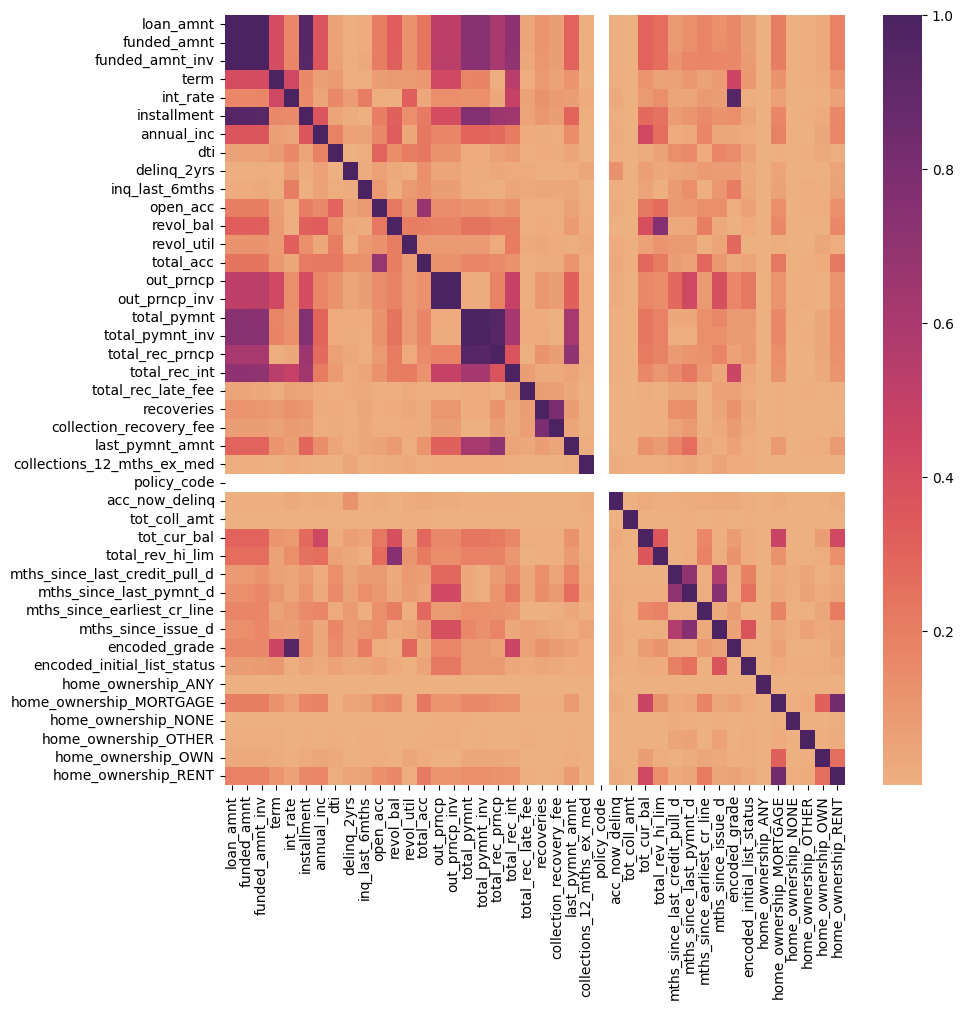

In [ ]:
corr_matrix = loan_df.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='flare')

Kolom 'policy_code' tampak tidak memiliki korelasi dengan kolom lainnya sehingga kolom ini perlu dihapus. Selain itu, kolom ini juga hanya memiliki satu nilai

In [ ]:
loan_df.drop('policy_code',axis=1,inplace=True)

In [ ]:
# Menghasilkan matriks segitiga atas (tanpa diagonal)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Mendapatkan salah satu dari pasangan kolom yang memiliki korelasi tinggi
hicorr_col = [column for column in upper.columns if any(upper[column] > 0.75)]
hicorr_col

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'collection_recovery_fee',
 'total_rev_hi_lim',
 'mths_since_issue_d',
 'encoded_grade',
 'home_ownership_RENT']

In [ ]:
loan_df.drop(hicorr_col,axis=1,inplace=True)

## Model Development

Target variable yang digunakan adalah kolom <code>loan_status</code>

In [ ]:
# Value dalam loan_status dan frekuensinya
loan_df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
current_df = loan_df[loan_df['loan_status']=='Current']
loan_df.drop(current_df.index,inplace=True)
loan_df.loan_status.value_counts()

Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
# Mendefinisikan kolom_bad sebagai list
kolom_bad = ['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# Mengganti nilai di dalam kolom 'loan_status' berdasarkan kondisi
Y = np.where(loan_df['loan_status'].isin(kolom_bad), 1, 0)

# Membuat DataFrame dari hasil penggantian nilai
Y = pd.DataFrame(Y, columns=['Encoded_loan_status'])

# Menampilkan DataFrame setelah perubahan
Y

,Encoded_loan_status
0,0
1,1
2,0
3,0
4,0
...,...
242054,1
242055,1
242056,0
242057,1


Nilai 1 digolongkan sebagai bad borrower sedangkan 0 digolongkan good borrower

In [ ]:
X = loan_df.drop('loan_status',axis=1)

#### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=80)

In [ ]:
X_train.shape

(193647, 30)

In [ ]:
X_test.shape

(48412, 30)

In [ ]:
y_train.head()

,Encoded_loan_status
24848,0
21593,0
67858,0
229254,0
156378,0


#### Training Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)
# Melatih model
random_forest_model.fit(X_train, y_train)

<ipython-input-102-99e70a65bdcb>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

#### Testing Model

In [ ]:
# Lakukan prediksi pada data uji
predictions = random_forest_model.predict(X_test)

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(predictions, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### Model Evaluation

##### ROC Curve

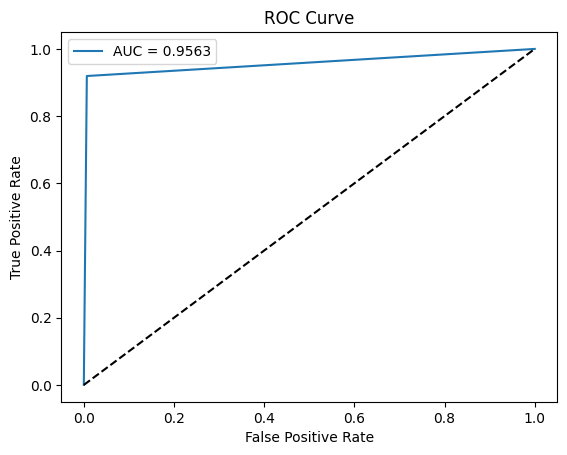

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Evaluasi model
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### KS

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [ ]:
df_actual_predicted.tail()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
48407,181451,1,1,48408,10190,38218,0.999917,0.999608,1.0
48408,137724,1,1,48409,10191,38218,0.999938,0.999706,1.0
48409,133736,1,1,48410,10192,38218,0.999959,0.999804,1.0
48410,233997,1,1,48411,10193,38218,0.999979,0.999902,1.0
48411,44558,1,1,48412,10194,38218,1.000000,1.000000,1.0


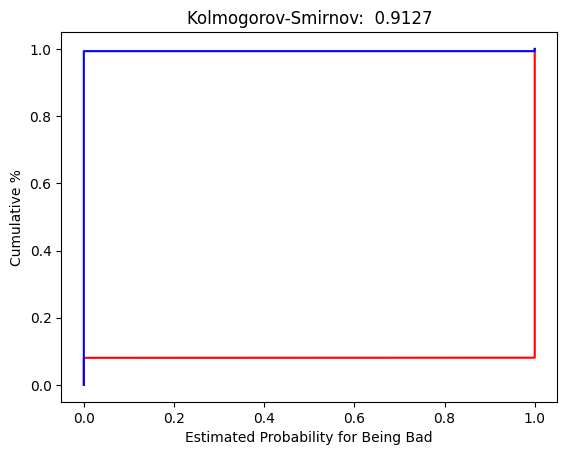

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)
plt.show()